In [1]:
#using Pkg
#Pkg.add("ImageView")
using Images, FileIO, Colors

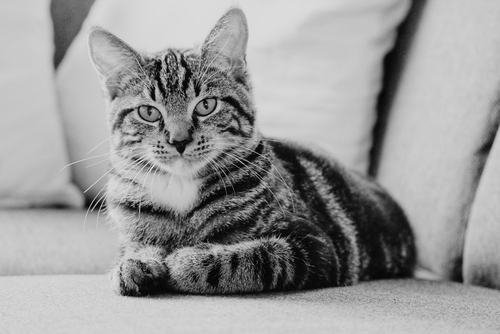

In [2]:
cat_one = load("cat_one_resize.jpg")
cat_oneg = Gray.(cat_one)

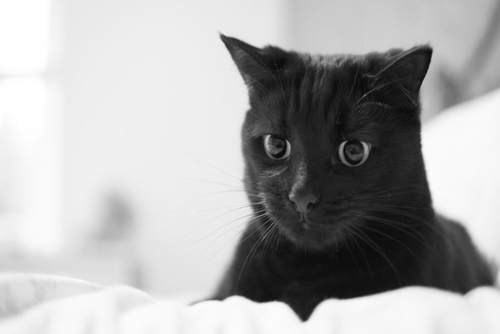

In [3]:
cat_two = load("cat_two_resize.jpg")
cat_twog = Gray.(cat_two)

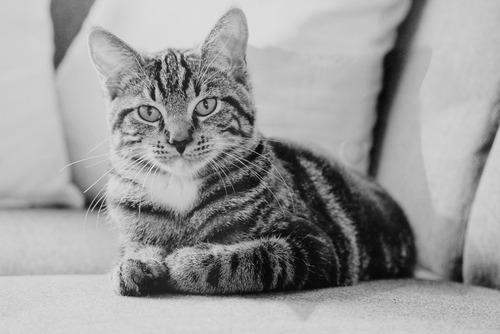

In [4]:
using LinearAlgebra
#convert image to array
mat_one = convert(Array{Float64},cat_oneg);
mat_two = convert(Array{Float64},cat_twog);
#get rows and column to later reconstruct the mixed image
rows,col = size(mat_one)
#convert 2D images to 1D (vector)
vec_one = vec(mat_one)';
vec_two = vec(mat_two)';

S = vcat(vec_one , vec_two)';

#generate first mixed signal
#factor used for the image
A = [0.9 , 0.1] 

X = (S .* A')'

X = X[1,:,]+X[2,:,]

imageX = reshape(X,rows,col)
save("mix_image_one.jpg",imageX)
load("mix_image_one.jpg")

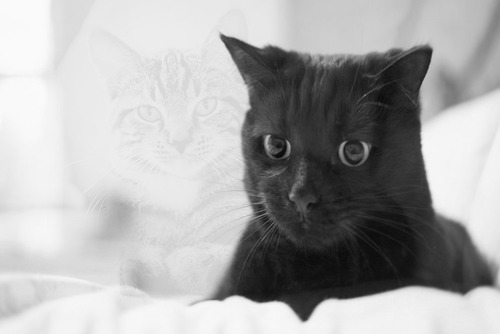

In [5]:
#generate second mixed signal
#factor used for the image
A = [0.1 , 0.9] 

Z = (S .* A')'

Z = Z[1,:,]+Z[2,:,]

imageZ = reshape(Z,rows,col)
save("mix_image_two.jpg",imageZ)
load("mix_image_two.jpg")


In [6]:


mixed_signal = hcat(X,Z)
    
#zca whitening 
#wX = fastICA.whiten(mixed_signal,false)

167000×2 Array{Float64,2}:
 0.802353  0.978039
 0.805882  0.978431
 0.805882  0.978431
 0.805882  0.978431
 0.809412  0.978824
 0.809412  0.978824
 0.812941  0.979216
 0.812941  0.979216
 0.809412  0.978824
 0.809412  0.978824
 0.809412  0.978824
 0.805882  0.978431
 0.805882  0.978431
 ⋮                 
 0.716863  0.930196
 0.727451  0.931373
 0.723922  0.93098 
 0.713333  0.929804
 0.727451  0.931373
 0.67451   0.92549 
 0.660392  0.923922
 0.723922  0.93098 
 0.738039  0.932549
 0.748235  0.930196
 0.73098   0.931765
 0.709412  0.925882

In [ ]:
#fastICA algorithm with iter = 1000, nic = 2
include("fastICA.jl")

X = fastICA.whiten(mixed_signal,true) * mixed_signal'


In [36]:

save("test.jpg",map(clamp01nan, reshape(abs.(W[1,:,]*256),rows,col)))
load("test.jpg")

FileIO.UnknownFormat{File{DataFormat{:UNKNOWN}}}: File{DataFormat{:UNKNOWN}}("/mnt/juliabox/FICA/src/test.jpg") couldn't be recognized by FileIO.


In [20]:
include("fastICA.jl")
K = fastICA.whiten(mixed_signal,true)
X = K * mixed_signal'

2×167000 Array{Float64,2}:
 -8.04412  -8.05933  -8.05933  -8.05933  …  -7.59504  -7.53863  -7.42766
 -1.50862  -1.50038  -1.50038  -1.50038     -1.47581  -1.52935  -1.56644

In [21]:
W = fastICA.fast_ica(10,2,X,0.0001,1.)

W for iter 1 = [0.608978 0.391022; 0.700424 0.676181]
Change for iter 1 = 0.08789051259350045
W for iter 2 = [0.608978 0.391022; 0.700424 0.676181]
Change for iter 2 = 0.08789051259350045
W for iter 3 = [0.608978 0.391022; 0.700424 0.676181]
Change for iter 3 = 0.08789051259350045
W for iter 4 = [0.608978 0.391022; 0.700424 0.676181]
Change for iter 4 = 0.08789051259350045
W for iter 5 = [0.608978 0.391022; 0.700424 0.676181]
Change for iter 5 = 0.08789051259350045
W for iter 6 = [0.608978 0.391022; 0.700424 0.676181]
Change for iter 6 = 0.08789051259350045
W for iter 7 = [0.608978 0.391022; 0.700424 0.676181]
Change for iter 7 = 0.08789051259350045
W for iter 8 = [0.608978 0.391022; 0.700424 0.676181]
Change for iter 8 = 0.08789051259350045
W for iter 9 = [0.608978 0.391022; 0.700424 0.676181]
Change for iter 9 = 0.08789051259350045
W for iter 10 = [0.608978 0.391022; 0.700424 0.676181]
Change for iter 10 = 0.08789051259350045
W for iter 1 = [0.608978 0.391022; 0.508805 0.491195]
Chan

2×2 Array{Float64,2}:
  0.84147    0.540304
 -0.931483  -0.363785

In [19]:
w = W * K
S = w * X

2×167000 Array{Float64,2}:
 -7.00057  -7.06837  -7.06837  -7.06837  …  -6.35687  -5.99244  -5.61111
 29.5634   29.6367   29.6367   29.6367      27.8325   27.5249   27.0265 

In [10]:
size(X)

(2, 167000)